<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/dchW5D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration: Load and visualize the data.

Use pandas to load the dataset and examine the first few rows.

Create a scatter plot to visualize the data points for students who were admitted versus those who were not based on their exam scores.

In [ ]:
import pandas as pd

# Define the URL to the text file
url = '/content/ex2data1.txt'

# Read the text file manually
data = []
with open(url, 'r') as file:
    for line in file:
        # Split the line by commas and append to data
        data.append(line.strip().split(','))

# Convert the list into a DataFrame
df = pd.DataFrame(data)

# Assign column names
df.columns = ['Exam 1 Score', 'Exam 2 Score', 'Admission Status']

# Display the first few rows
df.head()

,Exam 1 Score,Exam 2 Score,Admission Status
0,34.62365962451697,78.0246928153624,0
1,30.28671076822607,43.89499752400101,0
2,35.84740876993872,72.90219802708364,0
3,60.18259938620976,86.30855209546826,1
4,79.0327360507101,75.3443764369103,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Exam 1 Score      100 non-null    object
 1   Exam 2 Score      100 non-null    object
 2   Admission Status  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


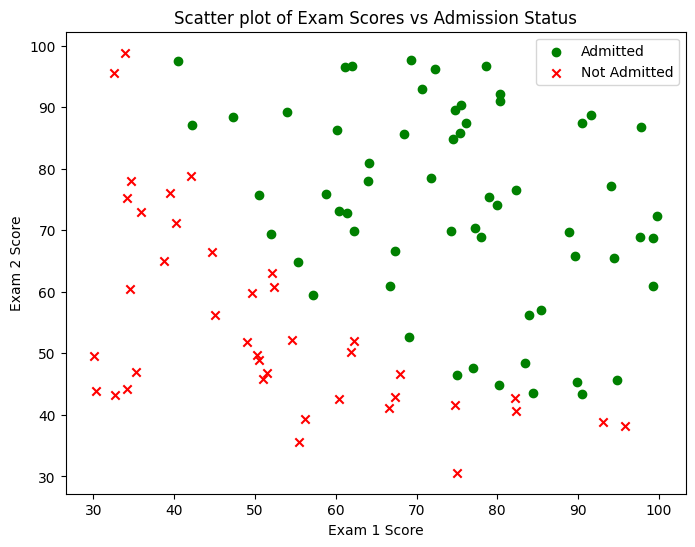

In [ ]:
import matplotlib.pyplot as plt

# Convert columns to appropriate data types
df['Exam 1 Score'] = df['Exam 1 Score'].astype(float)
df['Exam 2 Score'] = df['Exam 2 Score'].astype(float)
df['Admission Status'] = df['Admission Status'].astype(int)

# Scatter plot for visualization
admitted = df[df['Admission Status'] == 1]
not_admitted = df[df['Admission Status'] == 0]

plt.figure(figsize=(8, 6))

# Plot admitted students (Admission Status = 1)
plt.scatter(admitted['Exam 1 Score'], admitted['Exam 2 Score'], marker='o', color='g', label='Admitted')

# Plot not admitted students (Admission Status = 0)
plt.scatter(not_admitted['Exam 1 Score'], not_admitted['Exam 2 Score'], marker='x', color='r', label='Not Admitted')

# Adding labels and title
plt.title('Scatter plot of Exam Scores vs Admission Status')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

# Show legend
plt.legend()

# Display the plot
plt.show()

# Applying Logistic Regression with scikit-learn:

Implement logistic regression using the LogisticRegression function from scikit-learn to find the best parameters for your model.

Train the logistic regression model on your dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Define the features (X) and target variable (y)
X = df[['Exam 1 Score', 'Exam 2 Score']]  # Features
y = df['Admission Status']  # Target: Admission Status

# Step 2: Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the StandardScaler
scaler = StandardScaler()

# Step 4: Fit the scaler on the training data and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Step 5: Transform the test data using the already fitted scaler
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Step 7: Train (fit) the model on the scaled training set
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

# Making Predictions:

Use the trained logistic regression model to make predictions on your dataset.
Calculate the accuracy of your model.

In [ ]:
# Step 8: Make predictions on the scaled test set
y_pred = log_reg.predict(X_test_scaled)

# Model Evaluation:

Interpret the result of logistic regression and the accuracy of your model.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8000

Confusion Matrix:
[[7 1]
 [3 9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



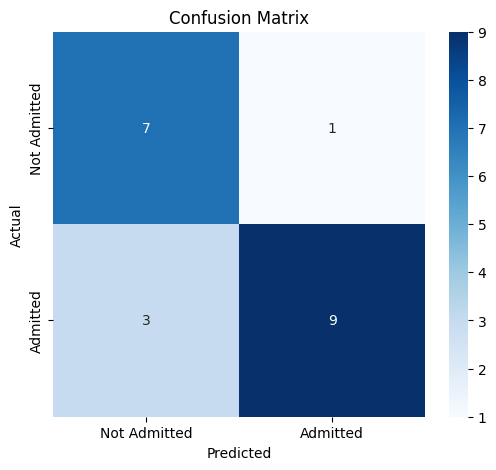

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])

#Add labels and title
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()